# Proyek Sains Data (Analisis Model Machine Learning)
#### PREDIKSI HARGA PENUTUPAN SAHAM HARIAN TOP 1 INDONESIA MENGGUNAKAN ALGORITMA LINEAR REGRESSION

### Kelompok 1:
1. 10121189 - Muhammad Izham Ali Azhar
2. 10121177 - Muhamad Gilang Abdul Gani
3. 10121191 - Harist Muhammad Lutfi
4. 10121194 - Muhamad Repiyan Riski
5. 10121203 - Azka Zaki Ramadhan
6. 10121178 - Faisal Rahman

## Data Preparation  

### Data Fetching

In [445]:
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf

# UNCOMMENT THIS BELOW IF YOU NEED TO FETCH NEW DATA
# ticker = "BBCA.JK"
# five_years_ago = (datetime.now() - timedelta(days=5*365)).strftime("%Y-%m-%d")
# data = yf.download(ticker, start=five_years_ago, progress=False)
# data.columns = [ columns[0].lower() for columns in data.columns ]
# data.index.name = data.index.name.lower()
# data.to_csv("../dataset/dataset_bbca_5y.csv")

data = pd.read_csv('../dataset/dataset_bbca_5y.csv')
data = data[[*data.drop('close', axis=1), 'close']]
data.sample(5)

,date,adj close,high,low,open,volume,close
478,2021-12-13 00:00:00+00:00,6796.854492,7400.0,7300.0,7375.0,59977100,7300.0
393,2021-08-12 00:00:00+00:00,5846.161133,6320.0,6120.0,6120.0,118325500,6300.0
132,2020-07-13 00:00:00+00:00,5633.885742,6240.0,6140.0,6230.0,86006000,6175.0
735,2022-12-28 00:00:00+00:00,8209.163086,8650.0,8550.0,8650.0,40420200,8650.0
1174,2024-10-31 00:00:00+00:00,10199.130859,10475.0,10250.0,10325.0,97553400,10250.0


### Data Cleaning

In [446]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1210 non-null   object 
 1   adj close  1210 non-null   float64
 2   high       1210 non-null   float64
 3   low        1210 non-null   float64
 4   open       1210 non-null   float64
 5   volume     1210 non-null   int64  
 6   close      1210 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 66.3+ KB


In [447]:
# Describe
data.describe()

,adj close,high,low,open,volume,close
count,1210.000000,1210.000000,1210.000000,1210.000000,1.210000e+03,1210.000000
mean,7512.857604,7978.235537,7833.206612,7906.648760,8.793680e+07,7904.570248
std,1647.023441,1497.963439,1500.490948,1496.917148,5.727128e+07,1501.197985
min,3973.115479,4800.000000,4325.000000,4450.000000,0.000000e+00,4430.000000
25%,6032.647217,6600.000000,6511.250000,6566.250000,5.707912e+07,6575.000000
50%,7402.054688,7950.000000,7800.000000,7850.000000,7.533225e+07,7900.000000
75%,8808.851562,9150.000000,9050.000000,9100.000000,1.020278e+08,9100.000000
max,10895.657227,10950.000000,10775.000000,10900.000000,7.564316e+08,10950.000000


In [448]:
# Missing Value Cleaning
display(data.isna().sum())
data.dropna(inplace=True)

date         0
adj close    0
high         0
low          0
open         0
volume       0
close        0
dtype: int64

### Feature Engineering

In [449]:
import pandas as pd

dataset = pd.DataFrame()
dataset['date'] = data['date']
dataset['close'] = data['close']
dataset['close_lag_1d'] = data['close'].shift(1)
dataset['close_lag_3d'] = data['close'].shift(3)
dataset['close_lag_3d_mean'] = data['close'].shift(1).rolling(window=3).mean()
dataset['close_lag_3d_max'] = data['close'].shift(1).rolling(window=3).max()
dataset['close_lag_3d_min'] = data['close'].shift(1).rolling(window=3).min()
dataset['close_lag_5d'] = data['close'].shift(5)
dataset['close_lag_5d_mean'] = data['close'].shift(1).rolling(window=5).mean()
dataset['close_lag_5d_max'] = data['close'].shift(1).rolling(window=5).max()
dataset['close_lag_5d_min'] = data['close'].shift(1).rolling(window=5).min()
dataset['close_std_5d'] = dataset['close'].rolling(window=5).std()

dataset.dropna(inplace=True)

dataset.sample(5)

,date,close,close_lag_1d,close_lag_3d,close_lag_3d_mean,close_lag_3d_max,close_lag_3d_min,close_lag_5d,close_lag_5d_mean,close_lag_5d_max,close_lag_5d_min,close_std_5d
729,2022-12-20 00:00:00+00:00,8575.0,8650.0,8500.0,8583.333333,8650.0,8500.0,8700.0,8615.0,8700.0,8500.0,57.554322
891,2023-08-29 00:00:00+00:00,9250.0,9200.0,9200.0,9225.000000,9275.0,9200.0,9300.0,9255.0,9300.0,9200.0,44.721360
561,2022-04-13 00:00:00+00:00,7800.0,7800.0,7850.0,7791.666667,7850.0,7725.0,7750.0,7775.0,7850.0,7725.0,48.733972
850,2023-06-26 00:00:00+00:00,9075.0,9050.0,9125.0,9075.000000,9125.0,9050.0,9000.0,9055.0,9125.0,9000.0,32.596012
374,2021-07-14 00:00:00+00:00,5990.0,6045.0,6020.0,6078.333333,6170.0,6020.0,6065.0,6063.0,6170.0,6015.0,70.940116


In [450]:
# Tranformasi Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset[dataset.columns[2:]] = scaler.fit_transform(dataset[dataset.columns[2:]])

dataset.sample(5)

,date,close,close_lag_1d,close_lag_3d,close_lag_3d_mean,close_lag_3d_max,close_lag_3d_min,close_lag_5d,close_lag_5d_mean,close_lag_5d_max,close_lag_5d_min,close_std_5d
846,2023-06-20 00:00:00+00:00,9050.0,0.700920,0.708589,0.708597,0.694288,0.717425,0.723926,0.710917,0.701493,0.720252,0.043110
615,2022-07-12 00:00:00+00:00,7175.0,0.413344,0.409509,0.406646,0.388576,0.419152,0.432515,0.407300,0.394693,0.420804,0.138074
311,2021-04-09 00:00:00+00:00,6200.0,0.261503,0.266104,0.257648,0.243765,0.267661,0.275307,0.245963,0.220564,0.268716,0.076613
151,2020-08-10 00:00:00+00:00,6120.0,0.268405,0.272239,0.262658,0.245374,0.274725,0.260736,0.247739,0.222222,0.267928,0.087518
14,2020-01-17 00:00:00+00:00,6875.0,0.371166,0.374233,0.363397,0.343524,0.377551,0.351994,0.345930,0.323383,0.361702,0.090917


In [451]:
# Data Splitting/Sampling
from sklearn.model_selection import train_test_split

X = dataset.drop(["close", "date"], axis=1)
y = dataset["close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (964, 10)
y_train shape: (964,)
X_test shape: (241, 10)
y_test shape: (241,)


## Modeling

In [452]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluation

In [453]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAPE: 0.011332430200983273
RMSE: 122.83037061420048
MAE: 85.30292416613604


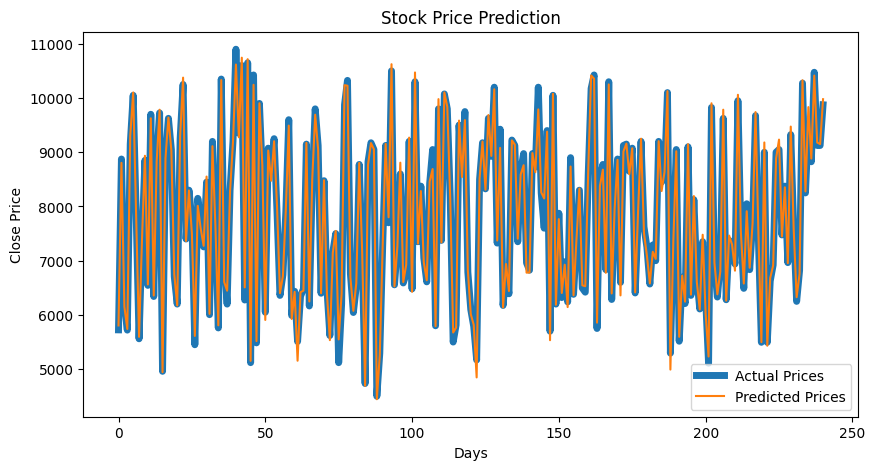

In [454]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label='Actual Prices', linewidth=5)
plt.plot(range(len(y_test)), y_pred, label='Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

## Deployment

In [455]:
# Variable
n_day_predict = 20

In [456]:
# Multi-step Prediction
import numpy as np
import pandas as pd

last_row = X_test.iloc[-1]
predictions = []

for _ in range(n_day_predict):
    last = pd.DataFrame([last_row], columns=X.columns)
    prediction = model.predict(last)[0]
    predictions.append(prediction)

    new_features = pd.Series(index=X.columns)
    new_features['close_lag_1d'] = prediction
    new_features['close_lag_3d'] = (y[-3:].tolist() + predictions[-3:])[-3]
    new_features['close_lag_3d_mean'] = np.mean((y[-3:].tolist() + predictions[-3:])[-3:])
    new_features['close_lag_3d_max'] = np.max((y[-3:].tolist() + predictions[-3:])[-3:])
    new_features['close_lag_3d_min'] = np.min((y[-3:].tolist() + predictions[-3:])[-3:])
    new_features['close_lag_5d'] = (y[-5:].tolist() + predictions[-5:])[-5]
    new_features['close_lag_5d_mean'] = np.mean((y[-5:].tolist() + predictions[-5:])[-5:])
    new_features['close_lag_5d_max'] = np.max((y[-5:].tolist() + predictions[-5:])[-5:])
    new_features['close_lag_5d_min'] = np.min((y[-5:].tolist() + predictions[-5:])[-5:])
    new_features['close_std_5d'] = np.std((y[-5:].tolist() + predictions[-5:])[-5:])
    
    new_features = scaler.transform(pd.DataFrame([new_features], columns=X.columns))[0]
    last_row = pd.Series(new_features, index=X.columns)

pd.DataFrame(predictions, columns=["close"]).sample(5)


,close
6,9928.560092
2,9928.673665
19,9946.151286
13,9937.723173
9,9932.103961


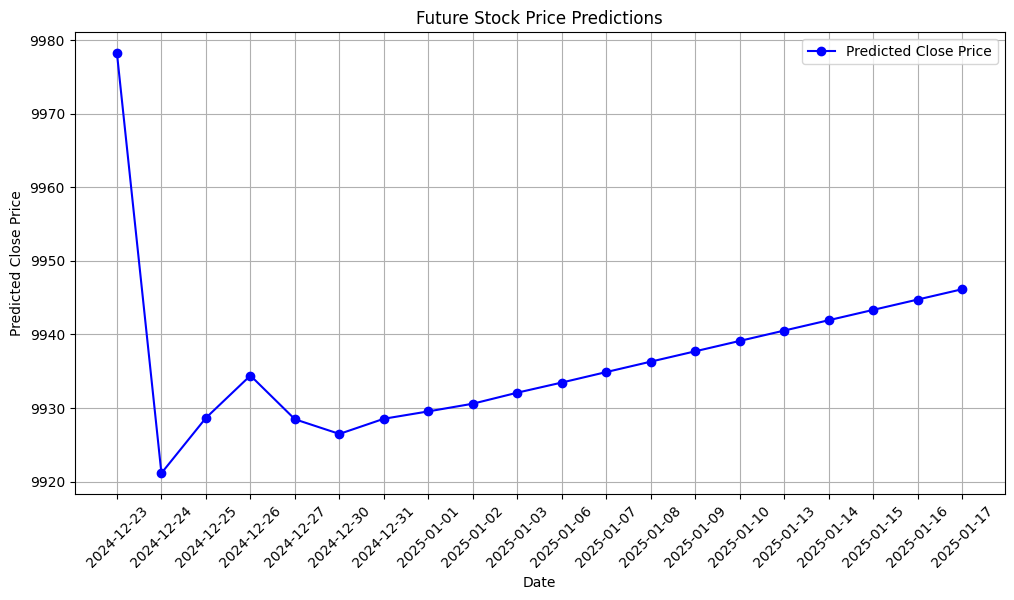

In [457]:
import pandas as pd

now =  pd.Timestamp('now').normalize()
future_workdays = pd.date_range(start=now, periods=n_day_predict, freq='B').strftime('%Y-%m-%d').tolist()

results = pd.DataFrame({"date": future_workdays, "close": predictions})
results

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['date'], results['close'], marker='o', linestyle='-', color='b', label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Predicted Close Price')
plt.title('Future Stock Price Predictions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()